In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime as dt, timedelta
import seaborn as sns
from functools import reduce
from sklearn.metrics import r2_score

In [4]:
#df = pd.read_csv('listings_sea.csv')

In [5]:
df_c = pd.read_csv('calendar_sea.csv')# Read calendar data showing of seattle obtained from airbnb 

In [6]:
df_c.columns# see the columns 

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [7]:
df_c.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
df_c = df_c[df_c['available']=='t']#take only the listing_id which are available

In [9]:
df_c.shape[0]# the number of rows after we remove not available rows

934542

In [10]:
df_c['date'] = pd.to_datetime(df_c['date'])#change the object into the date and split into year month and day

In [11]:
df_c[['year','month','day']] = df_c.date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

In [13]:
df_c.head()

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,$85.00,2016,01,04
1,241032,2016-01-05,t,$85.00,2016,01,05
9,241032,2016-01-13,t,$85.00,2016,01,13
10,241032,2016-01-14,t,$85.00,2016,01,14
14,241032,2016-01-18,t,$85.00,2016,01,18


In [14]:
len(df_c['listing_id'].unique())# numebr of unique listing_id

3723

In [15]:
df_list = pd.read_csv('listings_sea.csv')#read the listing file of seattle airbnb

In [16]:
df_list.shape[0]

3818

In [17]:
df_list = df_list.rename(index=str, columns={"id": "listing_id"})# we want to merge the two files 
df = pd.merge(df_c, df_list, on = 'listing_id')

In [18]:
columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']

In [19]:
df_r = df.drop(columns = columns_to_drop)

In [20]:
df_r_num = df_r.select_dtypes(include=['int','float'])#see the numerical columns

In [21]:
df_r_cat = df_r.select_dtypes(include=['object'])# see the categorical columns

In [22]:
df_r_num.columns

Index(['listing_id', 'host_listings_count', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count'],
      dtype='object')

In [23]:
df_r_cat.columns#we see the price_x, year , month , day in the categorical category

Index(['price_x', 'year', 'month', 'day', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bed_type', 'amenities', 'extra_people', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [24]:
df_r = df.dropna(subset=['price_x'])#remove any NaN from the column price_x

In [25]:
df_r['price'] = df_r['price_x'].astype(str)# change the string type to numerical 
df_r['price'] = df_r['price'].str.replace("[$, ]", "").astype("float")
df_r = df_r.drop(columns = ['price_x'])

In [26]:
df_r['month_'] = df_r['month'].astype(str)
df_r['month_'] = df_r['month_'].astype(int)
df_r = df_r.drop(columns = ['month'])

In [27]:
df_r['year_'] = df_r['year'].astype(str)
df_r['year_'] = df_r['year_'].astype("int")
df_r = df_r.drop(columns = ['year'])

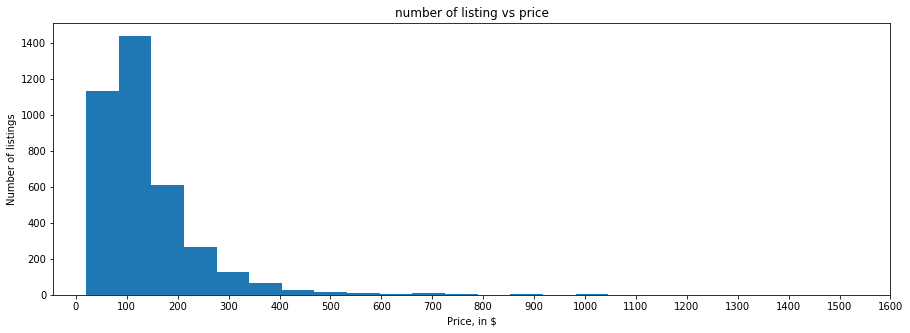

In [28]:
mean_price = df_r.groupby('listing_id').mean()['price']# to get the mean value of price according to 

#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, in $')
plt.title('number of listing vs price')


plt.savefig('Price_distribution.png')

plt.show()

In [29]:
listings_by_month = pd.Series([12])# get the number of listing for differnt month
for i in range(1, 13):
    listings_by_month[i] = len(df_r[(df_r['month_'] == i) & (df_r['year_'] == 2016)]['listing_id'])
    
listings_by_month = listings_by_month.drop(0)

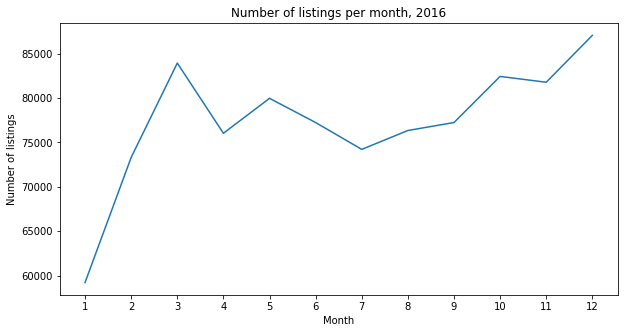

In [30]:
plt.figure(figsize=(10,5))
plt.plot(listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')

plt.savefig('number of available listings.png')

plt.show()

In [31]:
host_response_time = df_r["host_response_time"].unique()
host_response_time

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [32]:
df_r["host_response_time"].value_counts()


within an hour        418108
within a few hours    247843
within a day          148657
a few days or more     11420
Name: host_response_time, dtype: int64

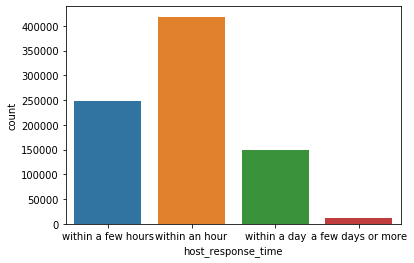

In [33]:
sns.countplot(df_r['host_response_time'])
plt.savefig('host_response_time.png')

In [34]:
df_r = df_r.dropna(subset=['host_response_rate', 'month_'])#drop any NaN for host_reponse_rate and month_

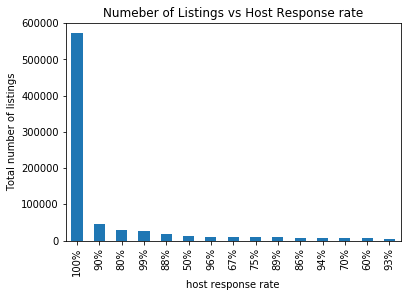

In [35]:
df_r['host_response_rate'].value_counts()[:15].plot(kind='bar')
plt.title("Numeber of Listings vs Host Response rate")
plt.ylabel("Total number of listings")
plt.xlabel('host response rate')
plt.savefig('host_response_rate_counts.png')#see the distint rate percentage of host responses rate

In [36]:
#get the number of listing with distinct host response time for different months
df_24 = df_r['month_'][df_r['host_response_time'] == 'within a day'].value_counts(normalize=True)
df_10 =df_r['month_'][df_r['host_response_time'] == 'within a few hours'].value_counts(normalize=True)
df_1 =df_r['month_'][df_r['host_response_time'] == 'within an hour'].value_counts(normalize=True)
df_72 =df_r['month_'][df_r['host_response_time'] == 'a few days or more'].value_counts(normalize=True)

In [37]:
#changing the value counts into the data frame with given index
df_24 = df_24.reset_index()
df_24.columns=['months', 'a_day']
df_10 = df_10.reset_index()
df_10.columns=['months', 'few_hours']
df_1 = df_1.reset_index()
df_1.columns=['months', 'an_hour']
df_72 = df_72.reset_index()
df_72.columns=['months', 'few_days']

In [38]:
#sort them by months 
df_24 = df_24.sort_values(by = 'months')
df_10 = df_10.sort_values(by = 'months')
df_1 = df_1.sort_values(by = 'months')
df_72 = df_72.sort_values(by = 'months')

In [39]:
#merge them into the single dataframe
data_frames = [df_1, df_10, df_24, df_72]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['months']), data_frames)

In [40]:
df_merged_ = pd.melt(df_merged, id_vars=['months']).sort_values(['variable','value'])

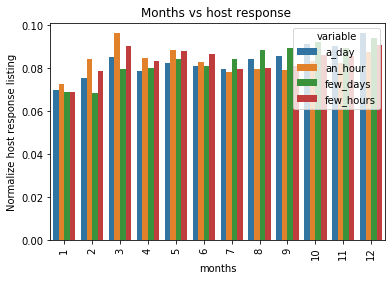

In [41]:
#plot multiple columns of host_response_time with months 
sns.barplot(x='months', y='value', data=df_merged_, hue = 'variable', orient ='v')
plt.xticks(rotation=90)
plt.ylabel('Normalize host response listing')
plt.title('Months vs host response ')
plt.savefig("host_response_time_vs_months.png")

In [42]:
df.columns

Index(['listing_id', 'date', 'available', 'price_x', 'year', 'month', 'day',
       'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodat

In [43]:
df_m = df[['accommodates','price_x','minimum_nights','bedrooms','host_acceptance_rate',
       'bathrooms','beds','host_listings_count','property_type','room_type','neighbourhood_group_cleansed','smart_location','maximum_nights','neighbourhood','host_response_rate', 'availability_30', 'availability_60', 'availability_90',
       'availability_365','host_is_superhost','cleaning_fee','security_deposit']]

In [44]:
#Remove the string dollar from the price, cleaning , fee and security deposit and change into float
df_m['price'] = df_m['price_x'].astype(str)# change the string type to numerical 
df_m['price'] = df_m['price'].str.replace("[$, ]", "").astype("float")
df_m = df_m.drop(columns = ['price_x'])
df_m['cleaning_fee_'] = df_m['cleaning_fee'].astype(str)# change the string type to numerical 
df_m['cleaning_fee_'] = df_m['cleaning_fee_'].str.replace("[$, ]", "").astype("float")
df_m = df_m.drop(columns = ['cleaning_fee'])
df_m['security_deposit_'] = df_m['security_deposit'].astype(str)# change the string type to numerical 
df_m['security_deposit_'] = df_m['security_deposit_'].str.replace("[$, ]", "").astype("float")
df_m = df_m.drop(columns = ['security_deposit'])

/Users/shivabhattarai/anaconda2/envs/Python37/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shivabhattarai/anaconda2/envs/Python37/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
#Remove % and change into the float
df_m['host_response_rates'] = df_m['host_response_rate'].astype(str)# change the string type to numerical 
df_m['host_response_rates'] = df_m['host_response_rates'].str.rstrip('%').astype('float') / 100.0
df_m = df_m.drop(columns = ['host_response_rate'])

In [46]:
df_m['host_acceptance_rates'] = df_m['host_acceptance_rate'].astype(str)# change the string type to numerical 
df_m['host_acceptance_rates'] = df_m['host_acceptance_rates'].str.rstrip('%').astype('float') / 100.0
df_m = df_m.drop(columns = ['host_acceptance_rate'])

In [47]:
#fill the NaN with mean
df_m['cleaning_fee_'] = df_m['cleaning_fee_'].fillna(df_m['cleaning_fee_'].mean())
df_m['security_deposit_'] = df_m['security_deposit_'].fillna(df_m['security_deposit_'].mean())
df_m['host_response_rates']=df_m['host_response_rates'].fillna(df_m['host_response_rates'].mean())
df_m['host_acceptance_rates']=df_m['host_acceptance_rates'].fillna(df_m['host_acceptance_rates'].mean())

In [48]:
#fill the NaN with mode.
df_m['bedrooms']=df_m['bedrooms'].fillna(df_m['bedrooms'].mode()[0])
df_m['bathrooms']=df_m['bathrooms'].fillna(df_m['bathrooms'].mode()[0])
df_m['beds']=df_m['beds'].fillna(df_m['beds'].mode()[0])
#df_m['host_response_time']=df_m['host_response_time'].fillna(df_m['host_response_time'].mode()[0])
df_m['neighbourhood']=df_m['neighbourhood'].fillna(df_m['neighbourhood'].mode()[0])
df_m['property_type']=df_m['property_type'].fillna(df_m['property_type'].mode()[0])
df_m['host_listings_count']=df_m['host_listings_count'].fillna(df_m['host_listings_count'].mode()[0])
df_m['host_is_superhost']=df_m['host_is_superhost'].fillna(df_m['host_is_superhost'].mode()[0])
#df_m['host_since']=df_m['host_since'].fillna(df_m['host_since'].mode()[0])

In [49]:
#check the null
np.sum(df_m.isnull())

accommodates                    0
minimum_nights                  0
bedrooms                        0
bathrooms                       0
beds                            0
host_listings_count             0
property_type                   0
room_type                       0
neighbourhood_group_cleansed    0
smart_location                  0
maximum_nights                  0
neighbourhood                   0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
host_is_superhost               0
price                           0
cleaning_fee_                   0
security_deposit_               0
host_response_rates             0
host_acceptance_rates           0
dtype: int64

In [50]:
#see the dtypes
df_m.dtypes

accommodates                      int64
minimum_nights                    int64
bedrooms                        float64
bathrooms                       float64
beds                            float64
host_listings_count             float64
property_type                    object
room_type                        object
neighbourhood_group_cleansed     object
smart_location                   object
maximum_nights                    int64
neighbourhood                    object
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
host_is_superhost                object
price                           float64
cleaning_fee_                   float64
security_deposit_               float64
host_response_rates             float64
host_acceptance_rates           float64
dtype: object

In [51]:
df_m.dtypes

accommodates                      int64
minimum_nights                    int64
bedrooms                        float64
bathrooms                       float64
beds                            float64
host_listings_count             float64
property_type                    object
room_type                        object
neighbourhood_group_cleansed     object
smart_location                   object
maximum_nights                    int64
neighbourhood                    object
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
host_is_superhost                object
price                           float64
cleaning_fee_                   float64
security_deposit_               float64
host_response_rates             float64
host_acceptance_rates           float64
dtype: object

In [52]:
#seperate the numerical and categorical columns
df_m_cat = df_m.select_dtypes(include='object')
df_m_num = df_m.select_dtypes(include=['int', 'float'])

In [53]:
df_m_cat.columns

Index(['property_type', 'room_type', 'neighbourhood_group_cleansed',
       'smart_location', 'neighbourhood', 'host_is_superhost'],
      dtype='object')

In [54]:
df_m_num.columns

Index(['accommodates', 'minimum_nights', 'bedrooms', 'bathrooms', 'beds',
       'host_listings_count', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365', 'price',
       'cleaning_fee_', 'security_deposit_', 'host_response_rates',
       'host_acceptance_rates'],
      dtype='object')

In [55]:
df_m.head()

,accommodates,minimum_nights,bedrooms,bathrooms,beds,host_listings_count,property_type,room_type,neighbourhood_group_cleansed,smart_location,...,availability_30,availability_60,availability_90,availability_365,host_is_superhost,price,cleaning_fee_,security_deposit_,host_response_rates,host_acceptance_rates
0,4,1,1.0,1.0,1.0,3.0,Apartment,Entire home/apt,Queen Anne,"Seattle, WA",...,14,41,71,346,f,85.0,63.226984,286.460638,0.96,1.0
1,4,1,1.0,1.0,1.0,3.0,Apartment,Entire home/apt,Queen Anne,"Seattle, WA",...,14,41,71,346,f,85.0,63.226984,286.460638,0.96,1.0
2,4,1,1.0,1.0,1.0,3.0,Apartment,Entire home/apt,Queen Anne,"Seattle, WA",...,14,41,71,346,f,85.0,63.226984,286.460638,0.96,1.0
3,4,1,1.0,1.0,1.0,3.0,Apartment,Entire home/apt,Queen Anne,"Seattle, WA",...,14,41,71,346,f,85.0,63.226984,286.460638,0.96,1.0
4,4,1,1.0,1.0,1.0,3.0,Apartment,Entire home/apt,Queen Anne,"Seattle, WA",...,14,41,71,346,f,85.0,63.226984,286.460638,0.96,1.0


In [56]:
df_m.corr(method='pearson')

,accommodates,minimum_nights,bedrooms,bathrooms,beds,host_listings_count,maximum_nights,availability_30,availability_60,availability_90,availability_365,price,cleaning_fee_,security_deposit_,host_response_rates,host_acceptance_rates
accommodates,1.000000,0.015056,0.767534,0.515530,0.859895,0.135520,-0.000865,-0.024549,-0.029532,-0.040532,-0.053081,0.676054,0.607635,0.248864,0.014399,0.013608
minimum_nights,0.015056,1.000000,0.006560,0.002369,-0.002967,0.000096,0.003656,0.014131,0.011356,0.010401,0.007156,0.012260,0.020097,0.010085,0.009728,-0.000530
bedrooms,0.767534,0.006560,1.000000,0.599138,0.747088,0.087729,-0.006342,-0.033273,-0.044880,-0.057588,-0.047246,0.631469,0.589895,0.294983,-0.000235,0.006414
bathrooms,0.515530,0.002369,0.599138,1.000000,0.504385,0.085243,-0.016524,-0.008675,-0.012106,-0.016632,0.007612,0.524733,0.476024,0.240837,0.019178,0.008781
beds,0.859895,-0.002967,0.747088,0.504385,1.000000,0.109971,-0.003767,-0.006153,-0.014506,-0.025114,-0.028523,0.608417,0.585639,0.253692,0.019255,0.012910
host_listings_count,0.135520,0.000096,0.087729,0.085243,0.109971,1.000000,0.043303,0.097802,0.104016,0.103935,0.065301,0.179398,0.188766,0.006863,0.028892,0.005720
maximum_nights,-0.000865,0.003656,-0.006342,-0.016524,-0.003767,0.043303,1.000000,0.012019,-0.007645,-0.006527,0.005344,0.010417,-0.004999,0.015841,-0.032980,-0.006529
availability_30,-0.024549,0.014131,-0.033273,-0.008675,-0.006153,0.097802,0.012019,1.000000,0.928155,0.861434,0.459801,0.007134,0.028725,-0.003757,-0.040800,-0.017103
availability_60,-0.029532,0.011356,-0.044880,-0.012106,-0.014506,0.104016,-0.007645,0.928155,1.000000,0.969661,0.526297,-0.001076,0.014516,-0.004239,-0.034085,-0.015114
availability_90,-0.040532,0.010401,-0.057588,-0.016632,-0.025114,0.103935,-0.006527,0.861434,0.969661,1.000000,0.574829,-0.006974,0.005769,-0.007767,-0.031119,-0.013899


In [57]:
#make dummy to the objects of  categorical columns 
df_mo = pd.get_dummies(df_m, columns =df_m_cat.columns)

In [58]:
df_mo.columns

Index(['accommodates', 'minimum_nights', 'bedrooms', 'bathrooms', 'beds',
       'host_listings_count', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90',
       ...
       'neighbourhood_University District', 'neighbourhood_Victory Heights',
       'neighbourhood_View Ridge', 'neighbourhood_Wallingford',
       'neighbourhood_Wedgewood', 'neighbourhood_Westlake',
       'neighbourhood_Windermere', 'neighbourhood_Yesler Terrace',
       'host_is_superhost_f', 'host_is_superhost_t'],
      dtype='object', length=142)

In [72]:
#Define x and y
y = df_mo['host_response_rates']
x= df_mo.drop(columns=['host_response_rates'], axis =1)

In [78]:
#Use the linear model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
rsquared_score = r2_score(y_test, y_test_pred)
length_y_test = len(y_test)

In [79]:
rsquared_score

0.10828483864750693

In [80]:
length_y_test

140182

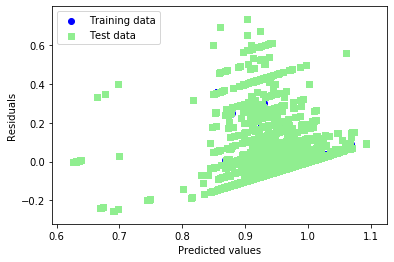

In [81]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.savefig('ResidualvsPredicted.png')
plt.show()